In [2]:
import pandas_datareader as dr
from pandas_datareader._utils import RemoteDataError
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime
%matplotlib inline

In [3]:
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
tmp = cm.update(
        "rise",
        {
            "theme": "moon",
            "transition": "fade",
            "autolaunch": True,
            "start_slideshow_at": 'beginning',
            "auto_select_fragment": True,
            "width": "100%",
            "height": "100%",
            "scroll": True,
            "enable_chalkboard": True,
            "slideNumber": True,
         }
    )

#  GROUP E : How Covid 19 Impacts the Economy
 - Lim Zhen Wei Zan
 - Hu Xinping
 - Huang Xuan
 - Lv Jishaodong
 - Tamilarasan S/O Teygarajan 

##                       <center>2020 is heavily impacted by Covid 19 Pandemic
### <center>- It has brought numerous deaths to human life as well as disaster to the economy
### <center>- This project is to study on how Covid 19 financially affects our society

In [6]:
STIclose= yf.download('^STI', start="2020-01-01", end="2020-09-14",period="1d").Close

[*********************100%***********************]  1 of 1 completed


## <center>Singapore Overall Economy </center>

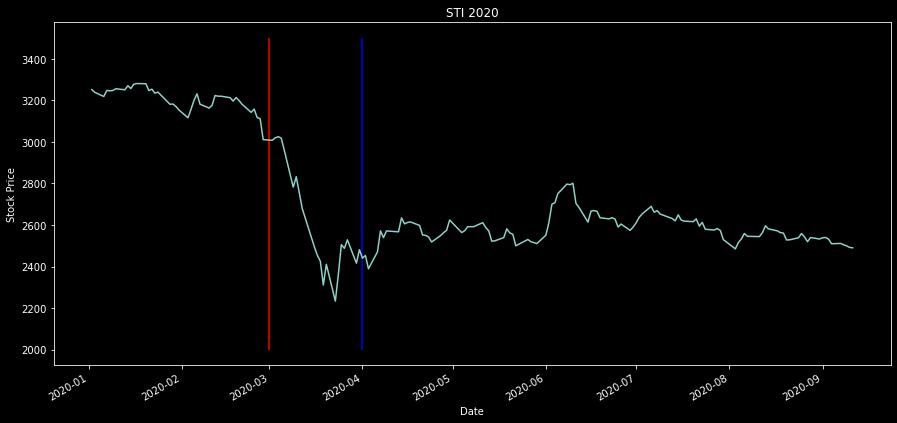

In [7]:
plt.style.use('dark_background')
STIclose.plot(figsize=(15,7))
plt.title("STI 2020")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.vlines("2020-03-1", 2000, 3500, colors = 'red', linestyle='solid')
plt.vlines("2020-04-1", 2000, 3500, colors = 'blue', linestyle='solid');

- March: Situation starting to get worse
- April: Circuit Breaker kick start and situation getting better
- However, still much worse compared to pre-Covid 19 period

In [5]:
#Industries
tickers = ["BIO", "AMZN", "MAR", "C6L.SI", "42R.SI"]
manystocks = yf.download(tickers, start="2020-01-02", end="2020-09-01",period="1d")
manystocks_groupby = yf.download(tickers, start="2020-01-02", end="2020-09-01",period="1d", group_by="Ticker")
stocksclose = yf.download(tickers, start="2020-01-02", end="2020-09-01",period="1d").Close

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


## <center> Responses of Different Industries to COVID 19

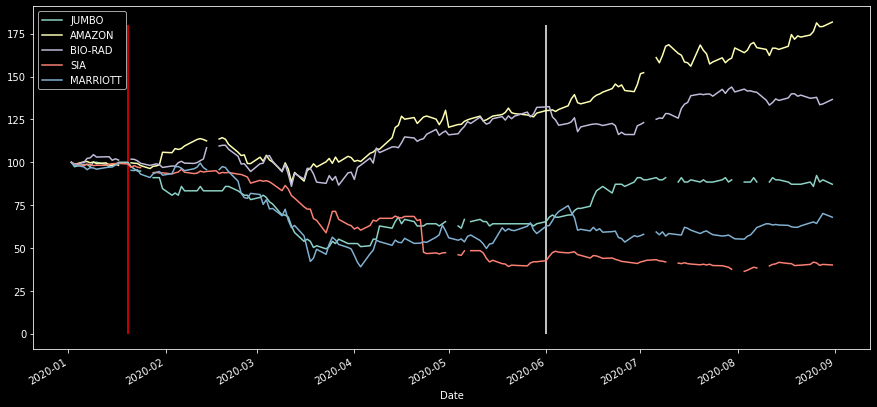

In [6]:
#manystocks
many_stocks_daily_returns = manystocks['Adj Close'].pct_change()
#many_stocks_daily_returns
(stocksclose/stocksclose.iloc[0]*100).plot(figsize=(15,7))
my_labels = ["JUMBO","AMAZON","BIO-RAD", "SIA", "MARRIOTT"]
plt.legend(labels=my_labels)
plt.vlines("2020-01-20", 0, 180, colors = 'red', linestyle='solid')
plt.vlines("2020-06-01", 0, 180, colors = 'white', linestyle='solid')
plt.style.use('dark_background')

- Red line -> impact of COVID hits
- White line -> Phase 1
- Different industries different impacts:
    - AMAZON and BIO-RAD better off
    - Aviation worst hit

## <center> Responses of Different Countries to COVID 19

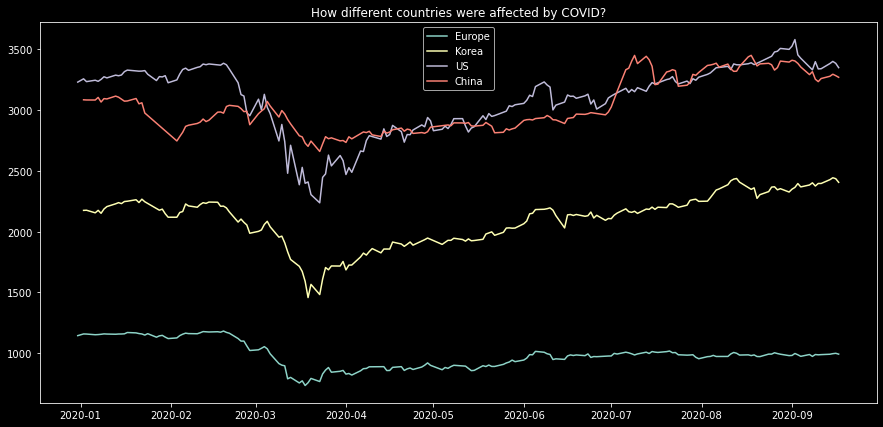

In [7]:
#Countries
US = dr.data.get_data_yahoo('^GSPC', start='2020-01-01', end=str(datetime.now().strftime('%Y-%m-%d')))
KOREA = dr.data.get_data_yahoo('^KS11', start='2020-01-01', end=str(datetime.now().strftime('%Y-%m-%d')))
EUROPE = dr.data.get_data_yahoo('^N100', start='2020-01-01', end=str(datetime.now().strftime('%Y-%m-%d')))
CHINA = dr.data.get_data_yahoo('000001.SS', start='2020-01-01', end=str(datetime.now().strftime('%Y-%m-%d')))

#fig = plt.figure()
plt.rcParams['figure.figsize'] = [15,7]
plt.plot(EUROPE[['Adj Close']], label = 'Europe')
plt.plot(KOREA[['Adj Close']], label = 'Korea')
plt.plot(US[['Adj Close']], label = 'US')
plt.plot(CHINA[['Adj Close']], label = 'China')
plt.legend()
plt.title('How different countries were affected by COVID?');

1. Countries indexes crash during early March.
2. US and Europe had been greatly affected and their road to recovery is slow which is reflcted in the chart.
3. China on the other handled the crisis fairly well, hence the chart does not fluctuate as much as other countries.
4. Even though South Korea handles the crisis well, its economy also took huge hit.

In [8]:
sti = yf.download('^STI', start='1997-11-01', end='1999-01-01', period="1w")
sti_daily_returns = sti['Adj Close'].pct_change()
sti1 = yf.download('^STI', start='2008-08-01', end='2009-08-01', period="1w")
sti1_daily_returns = sti1['Adj Close'].pct_change()
sti2 = yf.download('^STI', start='2019-09-01', end='2020-09-01', period="1w")
sti2_daily_returns = sti2['Adj Close'].pct_change()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## <center> Comparison to Past Financial Crisis    

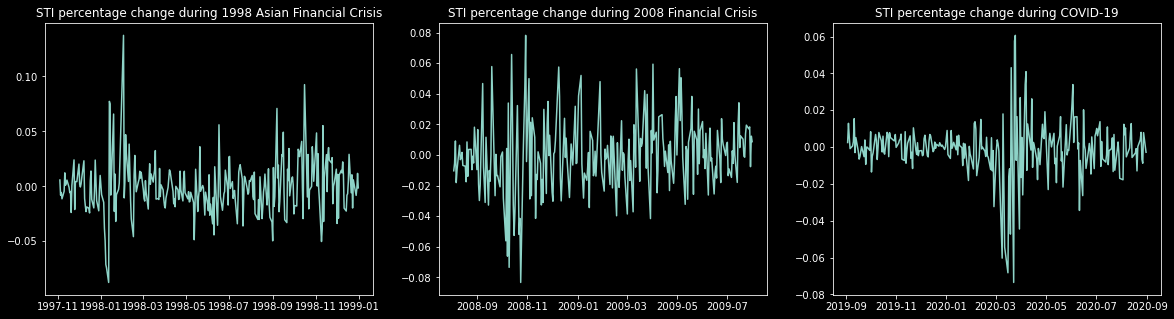

In [12]:
plt.style.use('dark_background')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
plt.rcParams['figure.figsize'] = [20, 5]
ax1.plot(sti_daily_returns)
ax1.set_title('STI percentage change during 1998 Asian Financial Crisis')
ax2.plot(sti1_daily_returns)
ax2.set_title('STI percentage change during 2008 Financial Crisis')
ax3.plot(sti2_daily_returns)
ax3.set_title('STI percentage change during COVID-19');

1. Compared all these three periods, in 2008 financial cirsis, STI percentage change drops more than 8% around Nov 2008 which is the most among these three periods. Moreover, in order to cope with the economic downturn in 2008 financial crisis, Singapore government pledged SGD 2.9 billion in Nov 2008 and the economy started to recover back from then.
2. Compared all these three periods, in Covid-19 period, the STI percentage change seems more stable than the other two before the crisis and after the sharp drop.

In [10]:
tickers = ["^STI", "^GSPC"]
sarsstocks = yf.download(tickers, start = "2002-11-16", end = "2003-07-31", period = "1w")
sars_stocks_returns = sarsstocks['Adj Close'].pct_change()
covidstocks = yf.download(tickers, start = "2019-11-16", end = "2020-07-31", period = "1w")
covid_stocks_returns = covidstocks['Adj Close'].pct_change()

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


## <center> STOCK MARKET PERFORMANCE 2003 SARS VS 2020 COVID </center>

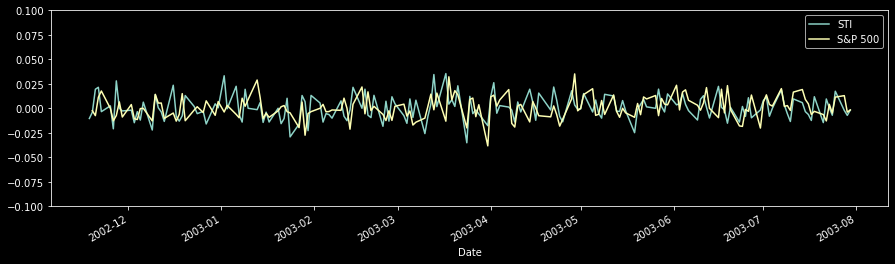

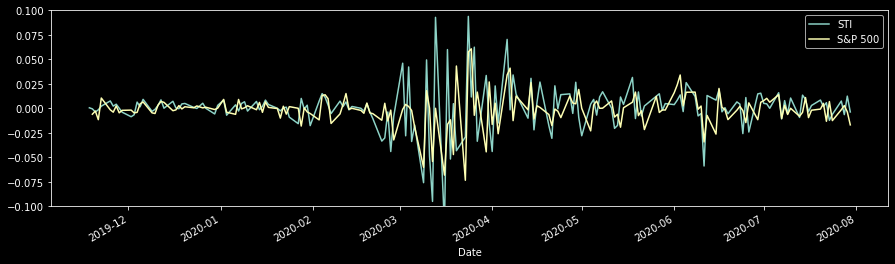

In [11]:
sars_stocks_returns.plot(figsize = (15, 4))
plt.legend(labels = ["STI", "S&P 500"])
plt.ylim(-0.1, 0.1)
covid_stocks_returns.plot(figsize = (15, 4))
plt.legend(labels = ["STI", "S&P 500"]);
plt.ylim(-0.1, 0.1);

- Compare Straits Times Index (STI) and S&P 500

- During SARS the stock market return are relatively stable

- During COVID the fluctuation maxed when the virus hit

#  <center>Thank You!